# Intro
Using various supervised learning strategies to perform multi-class classification on the reduced MNIST handwritten digits dataset from scikit-learn (10 classes - digits 0 through 9).

k-NN, decision tree, and SVM classifiers are compared, and use of hyperparameter tuning and pipelines are demonstrated. Train/test splits were used to characterize accuracies, and close to 99% accuracy was achieved with k-NN and SVM classifiers.

In [10]:
# Import necessary packages
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
sns.set()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping b

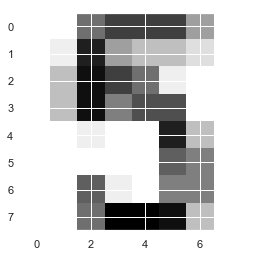

In [2]:
# Load the digits dataset
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

# k-NN classifier
Digits data was split into training and test sets, and a k-NN classifier from 1 to 9 neighbors was fit to the training data and accuracy characterized for overfitting and underfitting. (Maximum accuracy achieved of 98.6%, with 3 neighbors being optimal)

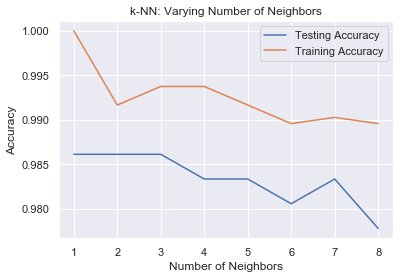

[0.98611111 0.98611111 0.98611111 0.98333333 0.98333333 0.98055556
 0.98333333 0.97777778]


In [8]:
# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

print(test_accuracy)

# Confusion matrix
k-NN was used to predict digits based on test split, and it appears that 1, 4, 6, 7, 8, and 9 are the digits that the classifier has the most difficulties with.

In [12]:
# Make predictions based on model and calculate confusion matrix
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[36  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  1  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  4  0  0  0  0  0  1 30  0]
 [ 0  0  0  0  1  0  0  0  1 34]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.88      1.00      0.94        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       0.97      1.00      0.99        36
           8       0.97      0.86      0.91        35
           9       1.00      0.94      0.97        36

   micro avg       0.98      0.98      0.98       360
   macro avg       

# Hyperparameter tuning

Used grid search and 5-fold cross-validation to determine optimal number of nearest neighbors for classifier. The best score of 98.8% was achieved with 3 neighbors.

In [21]:
# Set up hyperparameter grid
param_grid = {'n_neighbors': np.arange(2, 50)}

# Set up k-NN Classifier
knn = KNeighborsClassifier()

# Use GridSearchCV to fit data
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)

# Determine the optimal parameters and accuracy
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'n_neighbors': 3}
0.988169798190675


# Decision tree classifier

Also tried randomized search with a decision tree classifier, which was not able to perform as well as k-NN, with the best score around 78%.

In [20]:
# Set up the parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 1}
Best score is 0.7800974251913709


/Users/wyssuser/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# SVM Classifier and Pipeline
Created a pipeline to scale the data and perform a grid search for optimal SVM classifier parameters. Optimal cost and gamma were 10 and 0.01, respectively, which was able to achieve an accuracy of 98%, similar to the k-NN classifier.

In [25]:
# Set up the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Instantiate the GridSearchCV object
cv = GridSearchCV(pipeline, parameters, cv=5)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.9791376912378303
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.99      0.99      0.99        72
           2       0.97      0.98      0.98        66
           3       0.97      0.97      0.97        71
           4       0.97      0.99      0.98        78
           5       0.99      0.98      0.98        83
           6       0.99      1.00      0.99        69
           7       0.96      0.99      0.97        71
           8       0.98      0.95      0.97        65
           9       0.97      0.95      0.96        77

   micro avg       0.98      0.98      0.98       719
   macro avg       0.98      0.98      0.98       719
weighted avg       0.98      0.98      0.98       719

Tuned Model Parameters: {'SVM__C': 10, 'SVM__gamma': 0.01}
